# First Deep Learning Model

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [4]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [5]:
X.shape

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

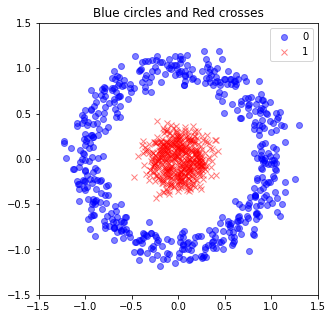

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

2021-12-06 21:54:42.423962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-06 21:54:42.424101: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
model = Sequential()

2021-12-06 21:54:45.839860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-06 21:54:45.840046: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-06 21:54:45.840195: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Manish-S): /proc/driver/nvidia/version does not exist
2021-12-06 21:54:45.849698: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [10]:
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X, y, epochs=20)

2021-12-06 21:54:47.646723: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-06 21:54:47.664221: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1799995000 Hz


Epoch 1/20
32/32 [==============================] - 1s 6ms/step - loss: 0.6734 - accuracy: 0.6310
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5945 - accuracy: 0.8020
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5009 - accuracy: 0.8440
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8590
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8630
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.8750
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8700
Epoch 8/20
32/32 [==============================] - 0s 7ms/step - loss: 0.3463 - accuracy: 0.8740
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.8620
Epoch 10/20
32/32 [==============================] - 0s 6ms/step - loss: 0.3360 - accuracy: 0.8700
Epoch 11/20
32/32 [

In [13]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

Text(0.5, 1.0, 'Blue circles and Red crosses')

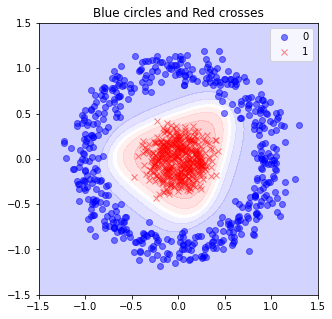

In [15]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")